In [14]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [15]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Ionosphere\Ionosphere_C_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
1.0,0.0,0.99539,NaN,0.85243,NaN,0.83398,-0.37708,1.00000,0.03760,0.85243,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,NaN
1.0,NaN,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,...,-0.20332,NaN,-0.20468,NaN,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
1.0,0.0,1.00000,-0.03365,1.00000,NaN,1.00000,-0.12062,0.88965,0.01198,0.73082,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
1.0,0.0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,...,NaN,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
1.0,0.0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.0,NaN,0.83508,0.08298,0.73739,-0.14706,NaN,-0.05567,0.90441,-0.04622,0.89391,...,NaN,-0.04202,NaN,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307
1.0,0.0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,0.96510,...,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712
1.0,0.0,NaN,-0.00034,0.93207,-0.03227,0.95177,NaN,0.95584,0.02446,0.94124,...,0.93988,0.03193,0.92489,0.02542,NaN,0.02242,0.92459,0.00442,0.92697,-0.00577
1.0,0.0,0.90608,-0.01657,0.98122,NaN,0.95691,-0.03646,0.85746,0.00110,0.89724,...,NaN,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,NaN,-0.16243


In [16]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	30
float64		column 2	27
float64		column 3	28
float64		column 4	42
float64		column 5	42
float64		column 6	33
float64		column 7	34
float64		column 8	31
float64		column 9	42
float64		column 10	39
float64		column 12	30
float64		column 13	44
float64		column 14	37
float64		column 15	35
float64		column 16	39
float64		column 17	33
float64		column 18	38
float64		column 19	35
float64		column 20	33
float64		column 21	33
float64		column 22	40
float64		column 23	33
float64		column 24	30
float64		column 25	36
float64		column 26	37
float64		column 27	35
float64		column 28	41
float64		column 29	38
float64		column 30	27
float64		column 31	34
float64		column 32	28
float64		column 33	36
float64		column 34	38


In [17]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,321.0,324.000000,323.000000,309.000000,309.000000,318.000000,317.000000,320.000000,309.000000,312.000000,...,315.000000,314.000000,316.000000,310.000000,313.000000,324.00000,317.000000,323.000000,315.000000,313.000000
mean,0.0,0.643276,0.050384,0.609317,0.115099,0.540605,0.119982,0.507911,0.163043,0.488633,...,0.390241,-0.054269,0.551961,-0.078230,0.392553,-0.01863,0.341117,-0.011825,0.349263,0.000295
std,0.0,0.496703,0.436351,0.500691,0.461908,0.500420,0.520712,0.510028,0.487763,0.555154,...,0.587339,0.505393,0.515384,0.556277,0.569504,0.51318,0.581739,0.526945,0.531460,0.475695
min,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.0,0.472753,-0.059835,0.427840,-0.024230,0.199265,-0.055670,0.104372,-0.052630,0.033618,...,0.000000,-0.290500,0.301065,-0.479947,0.000000,-0.23762,0.000000,-0.258435,0.000000,-0.199040
50%,0.0,0.876750,0.014030,0.804860,0.024770,0.721765,0.015460,0.686450,0.015990,0.681110,...,0.558670,-0.006135,0.727450,-0.021895,0.513840,0.00000,0.441410,0.000000,0.409560,0.000000
75%,0.0,1.000000,0.191795,1.000000,0.335980,0.961130,0.411760,0.938340,0.471730,0.959307,...,0.901050,0.163835,1.000000,0.158612,0.903300,0.17746,0.863640,0.204180,0.832195,0.166670
max,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

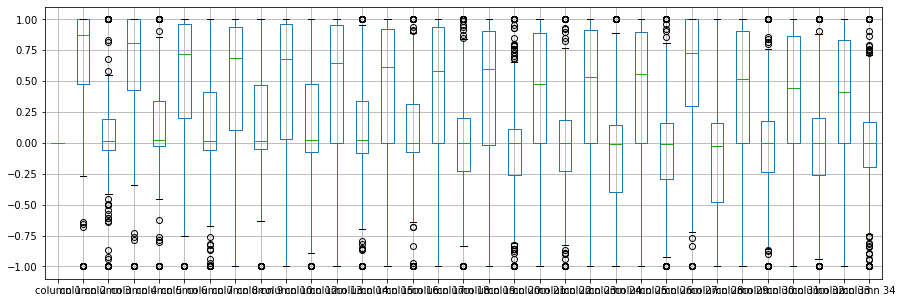

In [18]:
df.boxplot(return_type='axes', figsize=(15,5))

In [19]:
df.mean()

column 1     0.000000
column 2     0.643276
column 3     0.050384
column 4     0.609317
column 5     0.115099
column 6     0.540605
column 7     0.119982
column 8     0.507911
column 9     0.163043
column 10    0.488633
column 12    0.148233
column 13    0.412622
column 14    0.085362
column 15    0.352969
column 16    0.075860
column 17    0.371835
column 18    0.002548
column 19    0.358537
column 20   -0.040864
column 21    0.323744
column 22    0.010046
column 23    0.361999
column 24   -0.080936
column 25    0.390241
column 26   -0.054269
column 27    0.551961
column 28   -0.078230
column 29    0.392553
column 30   -0.018630
column 31    0.341117
column 32   -0.011825
column 33    0.349263
column 34    0.000295
dtype: float64

In [20]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
column 2,NaN,1.000000,0.097140,0.477792,0.059035,0.469056,-0.025095,0.482448,0.067330,0.300223,...,0.354138,-0.081540,0.027369,0.118644,0.309943,0.011588,0.263392,-0.042198,0.240058,0.032204
column 3,NaN,0.097140,1.000000,-0.073777,-0.223384,-0.123053,0.204483,-0.313546,0.248231,-0.153244,...,-0.077895,-0.211380,0.038478,0.009777,-0.003917,0.359640,-0.173342,-0.071939,-0.181367,0.029739
column 4,NaN,0.477792,-0.073777,1.000000,0.200295,0.633743,0.002079,0.474586,-0.062391,0.442135,...,0.275738,-0.055649,0.095014,0.179231,0.250684,0.029901,0.411385,0.068027,0.359656,-0.023542
column 5,NaN,0.059035,-0.223384,0.200295,1.000000,0.019688,0.272271,-0.075000,0.182706,-0.221158,...,-0.181404,-0.008206,-0.176477,-0.073268,-0.030601,-0.142010,-0.087195,0.325313,0.022092,0.176319
column 6,NaN,0.469056,-0.123053,0.633743,0.019688,1.000000,-0.177396,0.401100,-0.075641,0.415331,...,0.283766,0.090537,0.092616,0.157581,0.259625,-0.030142,0.397655,-0.023654,0.531143,-0.105379
column 7,NaN,-0.025095,0.204483,0.002079,0.272271,-0.177396,1.000000,-0.346448,0.370641,-0.371737,...,-0.212800,-0.184533,-0.277291,0.063502,-0.176970,0.079510,-0.185186,0.110613,-0.232946,0.345154
column 8,NaN,0.482448,-0.313546,0.474586,-0.075000,0.401100,-0.346448,1.000000,-0.267297,0.631551,...,0.367001,0.095269,0.148964,0.193512,0.289105,0.002445,0.322282,-0.045236,0.312518,-0.097727
column 9,NaN,0.067330,0.248231,-0.062391,0.182706,-0.075641,0.370641,-0.267297,1.000000,-0.339672,...,-0.242090,0.016419,-0.210577,0.144880,-0.117973,0.020668,-0.219891,-0.003046,-0.242191,0.113282
column 10,NaN,0.300223,-0.153244,0.442135,-0.221158,0.415331,-0.371737,0.631551,-0.339672,1.000000,...,0.400422,0.166514,0.324658,0.209358,0.431728,0.092678,0.280082,0.066420,0.345208,-0.111267


In [21]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [22]:
imputer = md.Midas(layer_structure = [34,34+37,34+37+37,34+37+37+37,34+37+37+37+37,34+37+37+37,34+37+37,34+37,34], vae_layer = False, seed = 370)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [33]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 17.393146151588077
Epoch: 1 , loss: 17.431376275562105
Epoch: 2 , loss: 17.440380913870676
Epoch: 3 , loss: 17.4058069955735
Epoch: 4 , loss: 17.40425509498233
Epoch: 5 , loss: 17.178697631472634
Epoch: 6 , loss: 17.22852711450486
Epoch: 7 , loss: 17.20402799333845
Epoch: 8 , loss: 17.1496334984189
Epoch: 9 , loss: 16.978223709833053
Epoch: 10 , loss: 16.95514928726923
Epoch: 11 , loss: 16.74596405029297
Epoch: 12 , loss: 16.2740573428926
Epoch: 13 , loss: 15.792973336719331
Epoch: 14 , loss: 15.635641779218401
Epoch: 15 , loss: 15.52409181140718
Epoch: 16 , loss: 15.491116478329612
Epoch: 17 , loss: 15.549762180873326
Epoch: 18 , loss: 15.482934815543038
Epoch: 19 , loss: 15.471173604329428
Epoch: 20 , loss: 15.379020781744094
Epoch: 21 , loss: 15.35617006392706
Epoch: 22 , loss: 15.333248320079985
Epoch: 23 , loss: 15.082134519304548
Epoch: 24 , loss: 15.287631080264138
Epoch: 25 , loss: 15.320212545

In [23]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


ValueError: putmask: mask and data must be the same size

In [ ]:
new_df=imputations[-1]
new_df.iloc[21,:]


In [ ]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Ionosphere.xlsx', header=None,names=column_names)

In [ ]:
new_df-complete_df

Calculating NRMSE Value

In [ ]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [ ]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [ ]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

In [ ]:
denominator=Frobenius_norm(complete_df)
denominator

In [ ]:
NRMS=numerator/denominator
NRMS


In [ ]:
new_df.iloc[66,:]

In [ ]:
imputations[-1]


In [41]:
imputations[-1].to_excel("Ionosphere_C_10(imp).xlsx", index=False, header=False)